# LAB 3 – SECTION A, BATCH 1, Date: 22nd Nov 2021, Cereals Dataset

In [3]:

import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import linear_model

cereal = pd.read_excel("Cereals.xlsx")

In [4]:
cereal_Raw = cereal
cereal_Raw

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
73,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


# Q1. Create a table with the 5-number summary of all the numeric attributes.

In [5]:
cereal_Raw.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.526316,1.013158,160.065789,2.048684,14.723684,6.934211,93.657895,28.289474,2.197368,1.030000,0.827500,42.327057
std,19.139378,1.089020,1.013159,84.318813,2.219038,4.160444,4.473136,68.502565,22.487813,0.832982,0.151438,0.227204,13.820602
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,132.500000,0.750000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,32.932466
50%,110.000000,2.500000,1.000000,180.000000,1.750000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.780847
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


# Q2. For each of the numeric attributes (proteins upto vitamins) , identify and replace all missing data(indicated with -1) with the arithmetic mean of the attribute.

In [6]:
# Treating Missing values using numpy :

cereal = cereal.replace(-1, np.NaN)

cereal['carbo'] = cereal['carbo'].fillna(cereal['carbo'].mean())
cereal['sugars'] = cereal['sugars'].fillna(cereal['sugars'].mean())
cereal['potass'] = cereal['potass'].fillna(cereal['potass'].mean())

In [7]:
cereal.describe()                   # Observe the min row of carbo, sugars and potass they have changed 

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.526316,1.013158,160.065789,2.048684,14.933333,7.040000,96.216216,28.289474,2.197368,1.030000,0.827500,42.327057
std,19.139378,1.089020,1.013159,84.318813,2.219038,3.737498,4.377031,66.687384,22.487813,0.832982,0.151438,0.227204,13.820602
min,50.000000,1.000000,0.000000,0.000000,0.000000,7.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,132.500000,0.750000,12.000000,3.000000,43.750000,25.000000,1.000000,1.000000,0.670000,32.932466
50%,110.000000,2.500000,1.000000,180.000000,1.750000,14.966667,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.780847
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [8]:
# Treating Missing values using pandas (Trying my Thoughts) :

value_carbo = cereal['carbo'].mean()
cereal['carbo'].replace(-1, value)

value_sugars = cereal['sugars'].mean()
cereal['sugars'].replace(-1, value)

value_potass = cereal['potass'].mean()
cereal['potass'].replace(-1, value)

cereal.describe()

NameError: name 'value' is not defined

# Q3. Create a table with the 5-number summary of all the numeric attributes after treating missing values. Do you think the strategy used in dealing with missing values was effective? 

In [9]:
# 5-number summary of all the numeric attributes after treating missing values :

cereal.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.526316,1.013158,160.065789,2.048684,14.933333,7.040000,96.216216,28.289474,2.197368,1.030000,0.827500,42.327057
std,19.139378,1.089020,1.013159,84.318813,2.219038,3.737498,4.377031,66.687384,22.487813,0.832982,0.151438,0.227204,13.820602
min,50.000000,1.000000,0.000000,0.000000,0.000000,7.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,132.500000,0.750000,12.000000,3.000000,43.750000,25.000000,1.000000,1.000000,0.670000,32.932466
50%,110.000000,2.500000,1.000000,180.000000,1.750000,14.966667,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.780847
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


# Q4. For each of the numeric attributes (proteins upto vitamins), identify and replace all noisy data with the median of attribute.

In [10]:
# Replacing all noisy data with the median of attribute with pandas :

for column in cereal[['protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']] :
    
    UB = cereal[column].mean() + 2*(cereal[column].std())
    LB = cereal[column].mean() - 2*(cereal[column].std())

    Median_column = cereal[column].median()
    cereal.loc[(cereal[column] > UB) | (cereal[column] < LB), column ] = Median_column

                          #     OR

#for column in cereal[['protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']] :

#    q1 = cereal[column].quantile(0.25)
#    q3 = cereal[column].quantile(0.75)
#    IQR = q3-q1
#
#    UB = q3 + 1.5*IQR
#    LB = q1 - 1.5*IQR
#
#    Median_column = cereal[column].median()
#    cereal.loc[(cereal[column] > UB) | (cereal[column] < LB), column ] = Median_column

#cereal.iloc[1, 8]
#cereal.iloc[60, 8]

In [11]:
# Replacing all noisy data with the median of attribute with numpy :

for column in cereal[['protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']] :
    
    UB = cereal[column].mean() + 2*(cereal[column].std())
    LB = cereal[column].mean() - 2*(cereal[column].std())

    Median_column = cereal[column].median()
    

In [12]:

for column in cereal[['protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']] :
    
    UB = cereal[column].mean() + 2*(cereal[column].std())
    LB = cereal[column].mean() - 2*(cereal[column].std())

    Median_column = cereal[column].median()
    cereal.loc[(cereal[column] > UB) | (cereal[column] < LB), column ] = Median_column
    
cereal.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.0,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.401316,0.828947,160.065789,1.556908,14.747368,7.040000,79.900427,25.0,2.197368,1.030000,0.827500,42.327057
std,19.139378,0.875670,0.719039,84.318813,1.213244,3.300825,4.377031,39.179106,0.0,0.832982,0.151438,0.227204,13.820602
min,50.000000,1.000000,0.000000,0.000000,0.000000,8.000000,0.000000,15.000000,25.0,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,132.500000,0.750000,12.000000,3.000000,43.750000,25.0,1.000000,1.000000,0.670000,32.932466
50%,110.000000,2.250000,1.000000,180.000000,1.562500,14.966667,7.000000,90.000000,25.0,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,1.000000,212.500000,2.775000,17.000000,11.000000,105.000000,25.0,3.000000,1.000000,1.000000,50.780847
max,160.000000,4.000000,2.000000,320.000000,4.000000,21.000000,15.000000,170.000000,25.0,3.000000,1.500000,1.500000,93.704912


In [13]:



#for column in cereal.loc[:, 0:8] :
    
#    UB = cereal[column].mean() + 2*(cereal[column].std())
#    LB = cereal[column].mean() - 2*(cereal[column].std())

#    Median_column = cereal[column].median()
#    cereal.loc[(cereal[column] > UB) | (cereal[column] < LB), column ] = Median_column
    
#cereal.describe()

# Q5. Create a table with the 5-number summary of all the numeric attributes after treating noisy values. Do you think the strategy used in dealing with noisy values was effective?

In [14]:
# The Values(such as Q1, Q2, Q3) should not change drastically after replacing, else the method we used is not accurate

cereal.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.0,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.401316,0.828947,160.065789,1.556908,14.747368,7.040000,79.900427,25.0,2.197368,1.030000,0.827500,42.327057
std,19.139378,0.875670,0.719039,84.318813,1.213244,3.300825,4.377031,39.179106,0.0,0.832982,0.151438,0.227204,13.820602
min,50.000000,1.000000,0.000000,0.000000,0.000000,8.000000,0.000000,15.000000,25.0,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,132.500000,0.750000,12.000000,3.000000,43.750000,25.0,1.000000,1.000000,0.670000,32.932466
50%,110.000000,2.250000,1.000000,180.000000,1.562500,14.966667,7.000000,90.000000,25.0,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,1.000000,212.500000,2.775000,17.000000,11.000000,105.000000,25.0,3.000000,1.000000,1.000000,50.780847
max,160.000000,4.000000,2.000000,320.000000,4.000000,21.000000,15.000000,170.000000,25.0,3.000000,1.500000,1.500000,93.704912


# Use the prepared or preprocessed data to answer the following:

# Q6. Cross tabulate the type of cereal (hot vs cold) against the manufacturer

In [15]:
# Cross Tabulation of 'mfr' Vs 'type' :

pd.crosstab(cereal['type'], cereal['mfr'])

mfr,A,G,K,N,P,Q,R
type,,,,,,,
C,0,22,23,4,9,7,8
H,1,0,0,1,0,1,0


# Q7. Which is the cereal with the best rating, worst rating?

In [16]:
# Most liked cereal and Most disliked cereal :

print("Most Liked cereal is :")
print(cereal[cereal['rating'] == cereal['rating'].max()]['name'])
print('\n')
print("Most Disliked cereal is :")
print(cereal[cereal['rating'] == cereal['rating'].min()]['name'])

Most Liked cereal is :
2    All-Bran_with_Extra_Fiber
Name: name, dtype: object


Most Disliked cereal is :
9    Cap'n'Crunch
Name: name, dtype: object


# Q8. Plot a side-by-side boxplot comparing the consumer rating of hot vs. cold cereals. 

AxesSubplot(0.1,0.15;0.8x0.75)


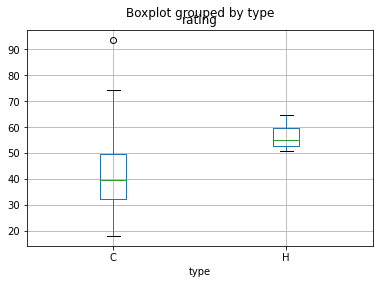

In [17]:
# Boxplot of 'rating' Vs 'type' :

print(cereal.boxplot(column = 'rating', by = 'type'))

         #    OR

#sb.catplot(x = 'type', y= 'rating', data = cereal, kind = "box")

# Q9. Is there a relation between sugars, calories, carbs, and fat?

<AxesSubplot:>

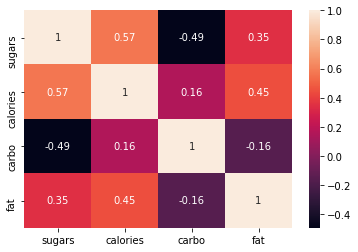

In [18]:
# Creating a Heatmap for the correlation matrix :

temp_df = cereal.loc[:, ['sugars', 'calories', 'carbo', 'fat']]
corr_mat = temp_df.corr()
sb.heatmap(corr_mat,annot = True)

# Here you can also Use a pairplot to jude the statement provided

# From the Heatmap we can conclude among the variables there is low degree of correlation or we can say there no considerable correlation

# Q10. Which manufacturers produce cereal with highest calories?

In [19]:
print("The manufacturer producing cereals with Highest calories is :")
print(cereal[cereal['calories'] == cereal['calories'].max()]['mfr'])

# It's Kellogs

The manufacturer producing cereals with Highest calories is :
45    K
Name: mfr, dtype: object


# Q11. Use correlation tests and visualization to identify if the two variables calories and consumer rating associated ?

The value of correlation coefficient b/w 'calories' and 'rating' :
-0.6743360496799723


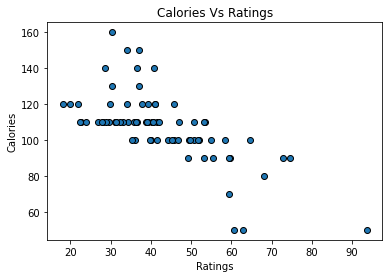

In [20]:
# Finding Pearsons correlation coefficient and visualising with matplotlib :

print("The value of correlation coefficient b/w 'calories' and 'rating' :")
print(cereal['calories'].corr(cereal['rating']))

plt.xlabel('Ratings')
plt.ylabel('Calories')
plt.title("Calories Vs Ratings")
plt.scatter(cereal.rating, cereal.calories, edgecolor = 'k');

# Using ';' at the end to suppress the Memory address of plot object we created

                #      OR

#sb.scatterplot(x = 'rating', y= 'calories', data = cereal);

**From plot we draw the conclusion that the degree of correlation is Negative and also low (i.e. -0.67) we can say there no strong relation as such between the consumer ratings and calories of the cereal**

# Q12. Use correlation tests and visualization to identify if the two variables shelf and consumer rating associated?

In [21]:
print(cereal.dtypes)                                 # Checking the data types of series in cereal df
cereal.shelf.unique()                                # Checking types of values in shelf column

name         object
mfr          object
type         object
calories      int64
protein     float64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars      float64
potass      float64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object


array([3, 1, 2], dtype=int64)

In [22]:
# Creating a new column 'shelfNum' in which the shelf column is converted to Numeric variable from Categorical variable :

cereal['shelfNum'] = cereal.shelf.map({ 1 : 0, 2 : 1, 3:2 })

# We can also use -> cereal['shelfNum'] = pd.factorize(cereal['shelf'], sort = True)[0]

cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,shelfNum
0,100%_Natural_Bran,Q,C,120,3.0,1,15,2.00,8.000000,8.0,135.000000,25,3,1.0,1.00,33.983679,2
1,All-Bran,K,C,70,4.0,1,260,1.75,14.966667,5.0,90.000000,25,3,1.0,0.33,59.425505,2
2,All-Bran_with_Extra_Fiber,K,C,50,4.0,0,140,1.75,8.000000,0.0,90.000000,25,3,1.0,0.50,93.704912,2
3,Almond_Delight,R,C,110,2.0,2,200,1.00,14.000000,8.0,96.216216,25,3,1.0,0.75,34.384843,2
4,Apple_Cinnamon_Cheerios,G,C,110,2.0,2,180,1.50,10.500000,10.0,70.000000,25,1,1.0,0.75,29.509541,0


The value of correlation coefficient b/w 'shelfNum' and 'rating' :
0.0019730207509652225


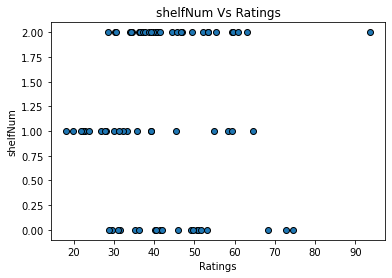

In [23]:
# Checking if the two variables shelf and consumer rating associated :

print("The value of correlation coefficient b/w 'shelfNum' and 'rating' :")
print(cereal['shelfNum'].corr(cereal['rating']))

plt.xlabel('Ratings')
plt.ylabel('shelfNum')
plt.title("shelfNum Vs Ratings")
plt.scatter(cereal.rating, cereal.shelfNum, edgecolor = 'k');

# Using ';' at the end to suppress the Memory address of plot object we created

                #      OR

#sb.scatterplot(x = 'rating', y= 'shelfNum', data = cereal);

**We can see that the value of pearsons correlation coefficint is very low (i.e. 0.00197) which indicates that there is no relation between the shelf of the cereal and the consumer ratings. We can infer the same from the scatter plot.**

# Q13. Is there a relation between manufacturer and rating?

In [24]:
print(cereal['rating'].min())
cereal['rating'].max()

18.042851


93.704912

In [25]:
cereal_rating_ranges = ["[{0} - {1})".format(rating, rating + 10.0) for rating in range(15, 95, 10)]
cereal_rating_ranges

# didn't understand why we use "[{0} - {1})"

['[15 - 25.0)',
 '[25 - 35.0)',
 '[35 - 45.0)',
 '[45 - 55.0)',
 '[55 - 65.0)',
 '[65 - 75.0)',
 '[75 - 85.0)',
 '[85 - 95.0)']

In [26]:
count_cereal_rating_ranges = len(cereal_rating_ranges)
count_cereal_rating_ranges

8

In [27]:
cereal['cereal_rating_Range'] = pd.cut( x = cereal['rating'], bins = count_cereal_rating_ranges, labels = cereal_rating_ranges)
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,shelfNum,cereal_rating_Range
0,100%_Natural_Bran,Q,C,120,3.0,1,15,2.00,8.000000,8.0,135.000000,25,3,1.0,1.00,33.983679,2,[25 - 35.0)
1,All-Bran,K,C,70,4.0,1,260,1.75,14.966667,5.0,90.000000,25,3,1.0,0.33,59.425505,2,[55 - 65.0)
2,All-Bran_with_Extra_Fiber,K,C,50,4.0,0,140,1.75,8.000000,0.0,90.000000,25,3,1.0,0.50,93.704912,2,[85 - 95.0)
3,Almond_Delight,R,C,110,2.0,2,200,1.00,14.000000,8.0,96.216216,25,3,1.0,0.75,34.384843,2,[25 - 35.0)
4,Apple_Cinnamon_Cheerios,G,C,110,2.0,2,180,1.50,10.500000,10.0,70.000000,25,1,1.0,0.75,29.509541,0,[25 - 35.0)


In [28]:
dataset_table=pd.crosstab(cereal['cereal_rating_Range'],cereal['mfr'])
print(dataset_table)

mfr                  A  G  K  N  P  Q  R
cereal_rating_Range                     
[15 - 25.0)          0  5  0  0  0  2  0
[25 - 35.0)          0  7  9  0  3  1  2
[35 - 45.0)          0  7  7  0  3  1  4
[45 - 55.0)          1  3  3  0  3  2  2
[55 - 65.0)          0  0  3  2  0  2  0
[65 - 75.0)          0  0  0  3  0  0  0
[85 - 95.0)          0  0  1  0  0  0  0


In [29]:
dataset_table.values 

array([[0, 5, 0, 0, 0, 2, 0],
       [0, 7, 9, 0, 3, 1, 2],
       [0, 7, 7, 0, 3, 1, 4],
       [1, 3, 3, 0, 3, 2, 2],
       [0, 0, 3, 2, 0, 2, 0],
       [0, 0, 0, 3, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0]], dtype=int64)

In [30]:
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[0 5 0 0 0 2 0]
 [0 7 9 0 3 1 2]
 [0 7 7 0 3 1 4]
 [1 3 3 0 3 2 2]
 [0 0 3 2 0 2 0]
 [0 0 0 3 0 0 0]
 [0 0 1 0 0 0 0]]


In [31]:
import scipy.stats as stats
val=stats.chi2_contingency(dataset_table)

In [32]:
val

(80.98724398131515,
 2.588973716493061e-05,
 36,
 array([[0.09210526, 2.02631579, 2.11842105, 0.46052632, 0.82894737,
         0.73684211, 0.73684211],
        [0.28947368, 6.36842105, 6.65789474, 1.44736842, 2.60526316,
         2.31578947, 2.31578947],
        [0.28947368, 6.36842105, 6.65789474, 1.44736842, 2.60526316,
         2.31578947, 2.31578947],
        [0.18421053, 4.05263158, 4.23684211, 0.92105263, 1.65789474,
         1.47368421, 1.47368421],
        [0.09210526, 2.02631579, 2.11842105, 0.46052632, 0.82894737,
         0.73684211, 0.73684211],
        [0.03947368, 0.86842105, 0.90789474, 0.19736842, 0.35526316,
         0.31578947, 0.31578947],
        [0.01315789, 0.28947368, 0.30263158, 0.06578947, 0.11842105,
         0.10526316, 0.10526316]]))

In [33]:
Expected_Values=val[3]

In [34]:
no_of_rows=len(dataset_table.iloc[0:7,0])
no_of_columns=len(dataset_table.iloc[0,0:7])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 36


In [35]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [36]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 12.375442739079103


In [37]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 50.99846016571065


In [38]:
#p-value

p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.9999167295054812
Significance level:  0.05
Degree of Freedom:  36
p-value: 0.9999167295054812


In [39]:
if chi_square_statistic>=critical_value:
    print("Reject H0 (NULL HYPOTHESIS), There is A RELATIONSHIP between the two categorical variables !")
else:
    print("Retain H0 (NULL HYPOTHESIS), There is NO RELATIONSHIP between the two categorical variables !")
    
if p_value<=alpha:
    print("Reject H0 (NULL HYPOTHESIS), There is A RELATIONSHIP between the two categorical variables !")
else:
    print("Retain H0 (NULL HYPOTHESIS), There is NO RELATIONSHIP between the two categorical variables !")

Retain H0 (NULL HYPOTHESIS), There is NO RELATIONSHIP between the two categorical variables !
Retain H0 (NULL HYPOTHESIS), There is NO RELATIONSHIP between the two categorical variables !


# Q14. Which nutrients are essential for a good rating for a cereal?

In [40]:
temp_df = cereal.loc[cereal['rating'] > 50.7 ,['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','rating']]
corr_mat = temp_df.corr(method='pearson')
corr_mat

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating
calories,1.000000,0.175306,0.329097,0.260754,0.335617,0.662623,0.398605,0.487698,NaN,-0.595256
protein,0.175306,1.000000,0.185174,0.367920,0.081182,0.062196,0.105856,0.462787,NaN,0.235564
fat,0.329097,0.185174,1.000000,0.306848,0.001395,0.072375,0.304550,0.231084,NaN,-0.461869
sodium,0.260754,0.367920,0.306848,1.000000,-0.028311,0.030649,0.061078,-0.045054,NaN,-0.267855
fiber,0.335617,0.081182,0.001395,-0.028311,1.000000,0.325662,0.186279,0.676234,NaN,0.085683
carbo,0.662623,0.062196,0.072375,0.030649,0.325662,1.000000,-0.126647,0.488290,NaN,-0.238173
sugars,0.398605,0.105856,0.304550,0.061078,0.186279,-0.126647,1.000000,0.169221,NaN,-0.589882
potass,0.487698,0.462787,0.231084,-0.045054,0.676234,0.488290,0.169221,1.000000,NaN,0.120949
vitamins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,-0.595256,0.235564,-0.461869,-0.267855,0.085683,-0.238173,-0.589882,0.120949,NaN,1.000000


<AxesSubplot:>

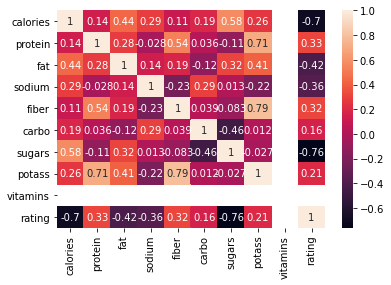

In [41]:
Q3_rating = cereal[column].quantile(0.75)
temp_df = cereal.loc[cereal['rating'] > Q3_rating ,['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','rating']]
corr_mat = temp_df.corr(method='pearson')
sb.heatmap(corr_mat, annot = True)

In [42]:
cereal['vitamins']

0     25
1     25
2     25
3     25
4     25
      ..
71    25
72    25
73    25
74    25
75    25
Name: vitamins, Length: 76, dtype: int64

In [43]:
cereal

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,shelfNum,cereal_rating_Range
0,100%_Natural_Bran,Q,C,120,3.0,1,15,2.00,8.000000,8.0,135.000000,25,3,1.0,1.00,33.983679,2,[25 - 35.0)
1,All-Bran,K,C,70,4.0,1,260,1.75,14.966667,5.0,90.000000,25,3,1.0,0.33,59.425505,2,[55 - 65.0)
2,All-Bran_with_Extra_Fiber,K,C,50,4.0,0,140,1.75,8.000000,0.0,90.000000,25,3,1.0,0.50,93.704912,2,[85 - 95.0)
3,Almond_Delight,R,C,110,2.0,2,200,1.00,14.000000,8.0,96.216216,25,3,1.0,0.75,34.384843,2,[25 - 35.0)
4,Apple_Cinnamon_Cheerios,G,C,110,2.0,2,180,1.50,10.500000,10.0,70.000000,25,1,1.0,0.75,29.509541,0,[25 - 35.0)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2.0,1,250,0.00,21.000000,3.0,60.000000,25,3,1.0,0.75,39.106174,2,[35 - 45.0)
72,Trix,G,C,110,1.0,1,140,0.00,13.000000,12.0,25.000000,25,2,1.0,1.00,27.753301,1,[25 - 35.0)
73,Wheat_Chex,R,C,100,3.0,1,230,3.00,17.000000,3.0,115.000000,25,1,1.0,0.67,49.787445,0,[45 - 55.0)
74,Wheaties,G,C,100,3.0,1,200,3.00,17.000000,3.0,110.000000,25,1,1.0,1.00,51.592193,0,[45 - 55.0)


In [44]:
cereal['Vitamins_Num'] = cereal.vitamins.map({ 0 : 0, 25 : 1, 100:2 })

In [45]:
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,shelfNum,cereal_rating_Range,Vitamins_Num
0,100%_Natural_Bran,Q,C,120,3.0,1,15,2.00,8.000000,8.0,135.000000,25,3,1.0,1.00,33.983679,2,[25 - 35.0),1
1,All-Bran,K,C,70,4.0,1,260,1.75,14.966667,5.0,90.000000,25,3,1.0,0.33,59.425505,2,[55 - 65.0),1
2,All-Bran_with_Extra_Fiber,K,C,50,4.0,0,140,1.75,8.000000,0.0,90.000000,25,3,1.0,0.50,93.704912,2,[85 - 95.0),1
3,Almond_Delight,R,C,110,2.0,2,200,1.00,14.000000,8.0,96.216216,25,3,1.0,0.75,34.384843,2,[25 - 35.0),1
4,Apple_Cinnamon_Cheerios,G,C,110,2.0,2,180,1.50,10.500000,10.0,70.000000,25,1,1.0,0.75,29.509541,0,[25 - 35.0),1


<AxesSubplot:>

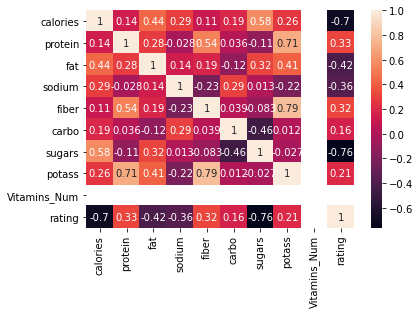

In [46]:
Q3_rating = cereal[column].quantile(0.75)
temp_df = cereal.loc[cereal['rating'] > Q3_rating ,['calories','protein','fat','sodium','fiber','carbo','sugars','potass','Vitamins_Num','rating']]
corr_mat = temp_df.corr(method='pearson')
sb.heatmap(corr_mat, annot = True)

# NOTE: 

# Use pearson corr() test, chi square test and find the most three related varibles 


# shelf is categorical varible not numeric, transform rating to categorical and use chi squared test

# Q15. Design a Linear regression model to predict the rating of a cereal based on top 3 related nutrients. Tabulate the accuracy of the model using a 80 ,20 split

In [47]:
reg = linear_model.LinearRegression()
reg.fit(cereal[['fiber', 'calories', 'sugars']], cereal.rating)

LinearRegression()

In [48]:
reg.coef_

array([ 4.21327745, -0.31057198, -1.46795733])

In [49]:
reg.intercept_

79.44741469817856

In [50]:
reg.predict([[cereal['fiber'].median(), cereal['calories'].median(), cereal['sugars'].median()]])

array([41.59204142])

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x = cereal[['fiber', 'calories', 'sugars']]
y = cereal['rating']

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 9)

In [54]:
len(x_train)

60

In [55]:
len(x_test)

16

In [56]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [57]:
reg.fit(x_train, y_train)

LinearRegression()

In [58]:
reg.predict(x_test)

array([26.4738172 , 44.82799641, 34.17774878, 28.38568239, 47.48430594,
       51.00767296, 37.43305856, 53.26774194, 29.30067849, 37.76084319,
       56.66139554, 42.54750826, 30.69368997, 35.19340875, 40.60812364,
       27.88724784])

In [59]:
y_test

17    22.396513
20    46.895644
26    40.917047
44    34.139765
58    39.703400
25    58.345141
48    40.692320
32    53.371007
36    28.742414
3     34.384843
70    46.658844
21    36.176196
23    32.207582
6     37.038562
14    41.445019
28    28.025765
Name: rating, dtype: float64

In [60]:
reg.score(x_test, y_test)

0.7093509483373102